<a href="https://colab.research.google.com/github/ntlt/Nguyen-Thi-Linh-Trang-191446079/blob/main/ANN_DOF3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
from keras.backend import dropout
from tensorflow.keras.utils import to_categorical

import numpy as np
import pandas as pd
import math
import seaborn as ses
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score,recall_score,confusion_matrix,classification_report,accuracy_score,f1_score

from keras.layers import Dense, Activation, Dropout, BatchNormalization, LSTM,Conv2D, MaxPooling2D, Flatten,LeakyReLU
from keras.models import Sequential
from tensorflow.keras.utils import to_categorical ,load_img, img_to_array
from tensorflow.keras.optimizers import RMSprop,SGD
from tensorflow.keras.models import load_model
from keras import callbacks
from keras.callbacks import EarlyStopping

In [2]:
datax = []
l1 = 50
l2 = 40
l3 = 25
for theta1 in range (-30,30):
    for theta2 in range (-45,45):
        for theta3 in range (-25,25):
            px = l1*np.cos(np.radians(theta1)) + l2*np.cos(np.radians(theta1 + theta2)) + l3*np.cos(np.radians(theta1 + theta2+ theta3))
            py = l1*np.sin(np.radians(theta1)) + l2*np.sin(np.radians(theta1 + theta2)) + l3*np.sin(np.radians(theta1 + theta2+ theta3))
            ci = theta1 + theta2 +theta3
            datax.append([theta1,theta2,theta3,px,py,ci])
data = pd.DataFrame(datax,columns=['theta1','theta2','theta3','ci','px','py'])
data

,theta1,theta2,theta3,ci,px,py
0,-30,-45,-25,49.312828,-88.257227,-100
1,-30,-45,-24,49.743170,-88.329242,-99
2,-30,-45,-23,50.174704,-88.393735,-98
3,-30,-45,-22,50.607298,-88.450687,-97
4,-30,-45,-21,51.040820,-88.500080,-96
...,...,...,...,...,...,...
269995,29,44,20,54.117455,87.458410,93
269996,29,44,21,53.681942,87.431773,94
269997,29,44,22,53.246960,87.397539,95
269998,29,44,23,52.812642,87.355719,96


In [3]:
x_df=data.drop(['theta1','theta2','theta3'],axis =1) 
y_df=data.drop(['px','py','ci'],axis =1) 

In [4]:
x_train,x_test,y_train,y_test = train_test_split(x_df,y_df,test_size=0.25,random_state =7)

In [5]:
print(x_train.shape)
print(x_test.shape)

(202500, 3)
(67500, 3)


In [6]:
model = Sequential()
model.add(Dense(512,activation='relu',input_shape=(3,)))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))


model.add(Dense(3))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               2048      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_4 (Dense)             (None, 512)               2

In [7]:
# Huấn luyện mô hình 
model.compile(loss = 'mse', optimizer = RMSprop() , metrics = ['accuracy'])
history = model.fit(x_train,y_train,batch_size=1000,epochs=200,verbose=1,validation_split=0.2,callbacks=[EarlyStopping(monitor='val_loss',patience=70)]) 


Epoch 1/200
162/162 [==============================] - 5s 7ms/step - loss: 216.4041 - accuracy: 0.6184 - val_loss: 167.8872 - val_accuracy: 0.6068
Epoch 2/200
162/162 [==============================] - 1s 5ms/step - loss: 148.3342 - accuracy: 0.6763 - val_loss: 142.7737 - val_accuracy: 0.6697
Epoch 3/200
162/162 [==============================] - 1s 6ms/step - loss: 141.5128 - accuracy: 0.6853 - val_loss: 141.5958 - val_accuracy: 0.6942
Epoch 4/200
162/162 [==============================] - 1s 8ms/step - loss: 138.4164 - accuracy: 0.6894 - val_loss: 140.2445 - val_accuracy: 0.6906
Epoch 5/200
162/162 [==============================] - 1s 8ms/step - loss: 136.3151 - accuracy: 0.6926 - val_loss: 136.1994 - val_accuracy: 0.6949
Epoch 6/200
162/162 [==============================] - 1s 8ms/step - loss: 135.0513 - accuracy: 0.6941 - val_loss: 131.9087 - val_accuracy: 0.6976
Epoch 7/200
162/162 [==============================] - 1s 5ms/step - loss: 133.8656 - accuracy: 0.6952 - val_loss: 134

In [8]:
# Đánh giá độ chính xác của mô hình
score = model.evaluate(x_test,y_test,verbose=0)
print('Test loss =', score[0])
print('Test accuracy =', score[1])


Test loss = 285.9169616699219
Test accuracy = 0.6707851886749268


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 't' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'r' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'a' instances.
A proxy artist may be used instead.
See: http://matplotlib.org/users/legend_guide.html#creating-artists-specifically-for-adding-to-the-legend-aka-proxy-artists
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: Legend does not support 'i' instances.
A proxy artist may be used instead.
See: http:/

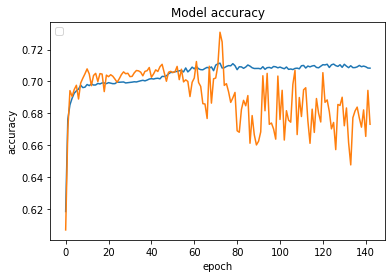

In [9]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend('train', 'validation', loc = 'upper left')
plt.show()

In [10]:
from tensorflow.keras.models import load_model
model.save('DOF3.h5')
model_ANNROBOT = load_model('DOF3.h5')

In [11]:
model_test=load_model('DOF3.h5')

In [12]:
asd = np.array([[67,58,55],[10,70,90]])
y_predict = model_test.predict(asd)
print(y_predict)

[[ 6.8420053 41.06792   -1.2953887]
 [16.096134  35.173893  17.64273  ]]
